**Bank dataset to understand the reason why customers leave the bank. The idea is to build a predictive model that can predict if any new customer leaves the bank. Model is trained on the dataset "Churn_Modelling". This is clasification task.**

### Churn Modelling - comparing several ML models from sklearn library

 **Logistic regression, LightGBM, XGboost, CatBoost.**

#### Part 0 - Importing the libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

#### Part 1 - Data Preprocessing

Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


#### Part 1 - Exploring the data

In [3]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


**Checking fot null and duplicate values**

In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
print(dataset.duplicated(subset='CustomerId').sum())

2


In [7]:
if 1 in (dataset.isnull().sum().values):
    dataset=dataset.dropna(axis=0)

In [8]:
dataset=dataset.drop_duplicates()

In [9]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


**There are some rows that are duplicated, droped them.**
**For the rows that have missing values because it's a negligibale amount also drop them**

In [10]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


### Plotting the features of the dataset to see the correlation between them

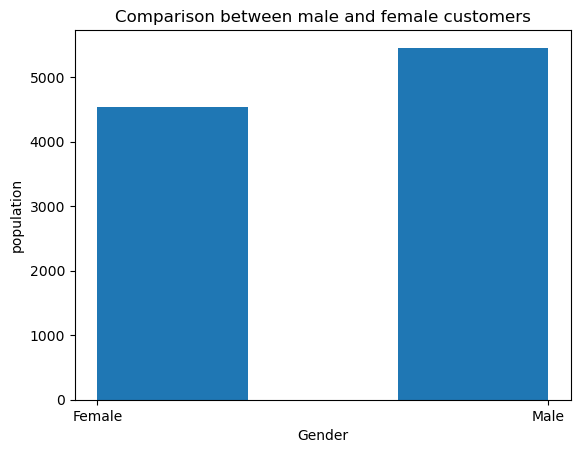

In [11]:

plt.hist(x = dataset.Gender, bins = 3)
plt.title('Comparison between male and female customers')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [12]:
dataset['Gender'].value_counts()

Gender
Male      5454
Female    4542
Name: count, dtype: int64

#### Comparison of age in the dataset

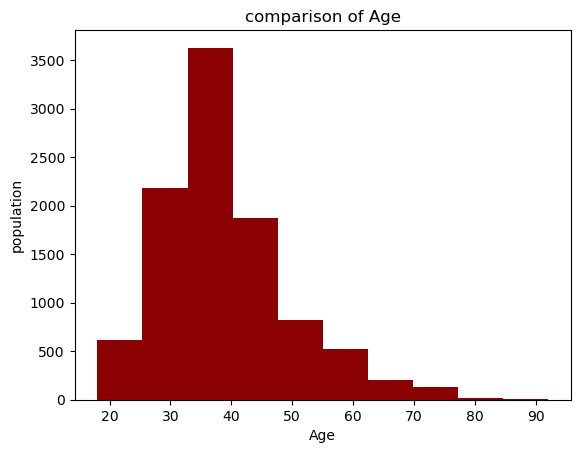

In [13]:
plt.hist(x = dataset.Age, bins = 10, color = 'darkred')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

### Comparison of geography

In [14]:
dataset['Geography'].value_counts()

Geography
France     5011
Germany    2509
Spain      2476
Name: count, dtype: int64

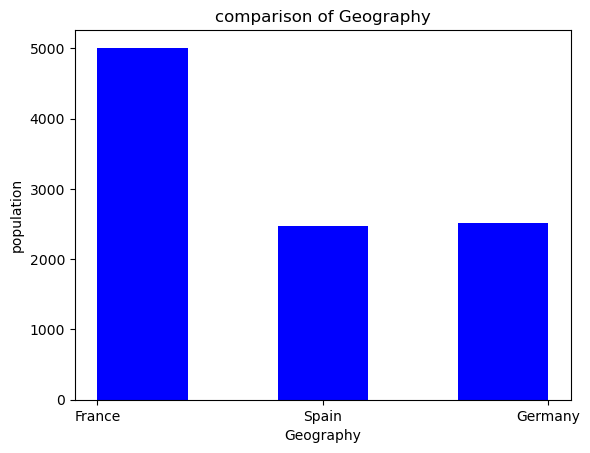

In [15]:
plt.hist(x = dataset.Geography, bins = 5, color = 'blue')
plt.title('comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

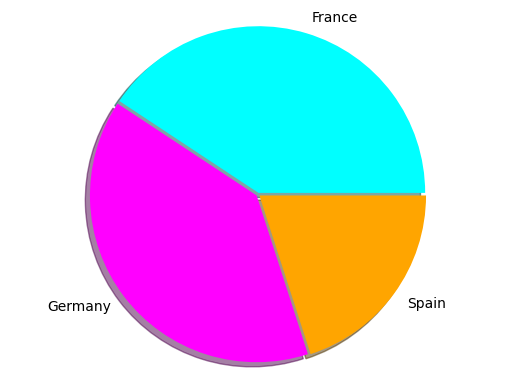

In [16]:
labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

In [17]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### How many active member does the bank have ?

In [18]:
dataset['IsActiveMember'].value_counts()

IsActiveMember
1.0    5147
0.0    4849
Name: count, dtype: int64

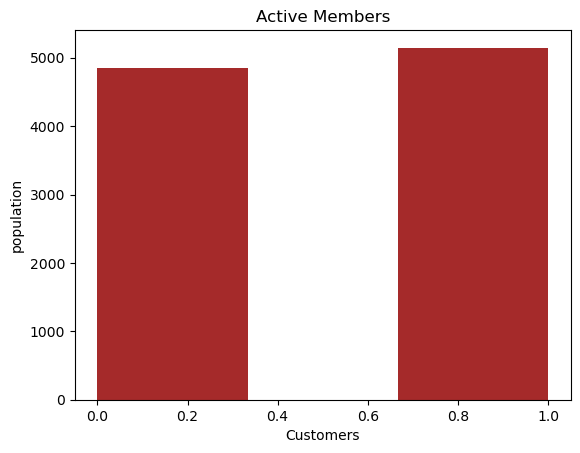

In [19]:
plt.hist(x = dataset.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()

#### Number of product the customer use

<Axes: xlabel='Exited', ylabel='count'>

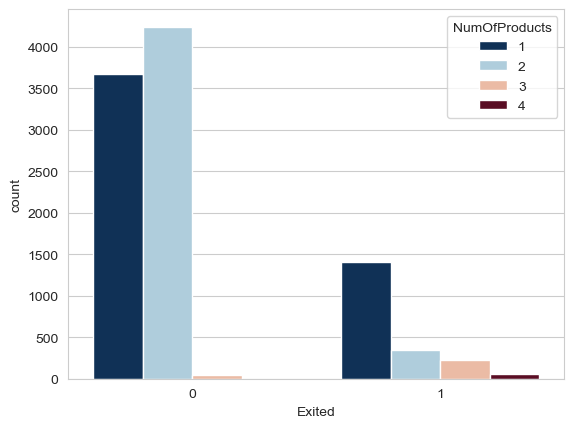

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='NumOfProducts',data=dataset,palette='RdBu_r')

**Droping the first three columns, not useful for the model  - "RowNumber",	"CustomerId",	"Surname".**

In [21]:
dataset = dataset.drop(['RowNumber','CustomerId','Surname'], axis=1)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


**Encoding categorical data**

**One-hot encoding is the representation of categorical variables as binary vectors. Label Encoding is converting labels/words into numeric form. Using one-hot encoding increases the dimensionality of the data set. Label encoding doesn't affect the dimensionality of the data set, so it is used there.**

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset.Gender.values)
dataset['Geography'] = le.fit_transform(dataset.Geography.values)

In [23]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,516,0,1,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,709,0,0,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1


**Checking for correlations**

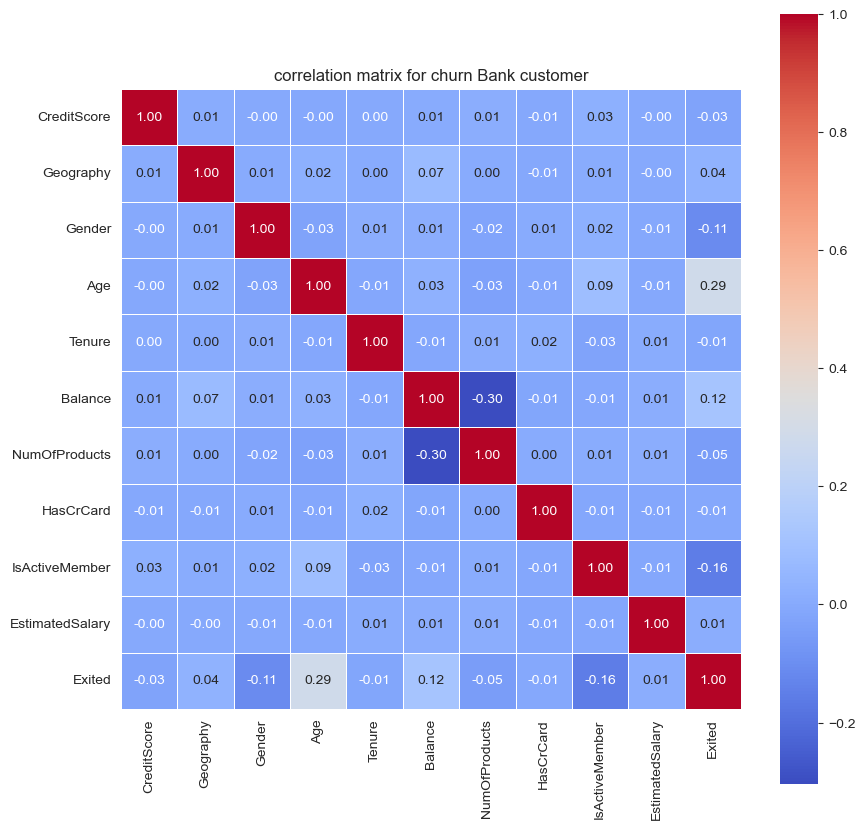

In [24]:
corr_matrix=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,linewidths=0.7,fmt=".2f", cmap='coolwarm', square=True)
plt.title("correlation matrix for churn Bank customer")
plt.show()

**There is a strong positive correlation between the "Age" and the "Exited" colunns, which means that older person are more probable to exit.**

**There is a strong negative correlation between the "Number of Products" and "Is active member" with the exited probability. This means, that when a person is more active the probability of exiting is low, also when a client has more products in the bank, they are less probable to exit.**

**From this it is clear that these two variables are strongly important in the decision of the probability of a customer to exit.**

#### Part 3 - Splitting the dataset into the Training set and Test set 30/70 percent as requested

In [25]:
X = dataset.drop(['Exited'], axis=1)
y = dataset[['Exited']]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Part 4 - Building the models - Logistic Regression, LightGBM, XGboost, CatBoost.

In [27]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

**Logistic Regression model - good choice  in scenarios with a simple binary outcome and a wealth of customer data. It's particularly valuable for businesses that want to predict customer churn while understanding the "why" behind it.**

In [28]:
logreg = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=100000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_pred[5:15])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 0 0 0 0 0 0 0 0 0]


In [29]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC:", roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

[[2299   80]
 [ 506  114]]
Accuracy: 0.8046015338446149
ROC: 0.5751216965653771
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2379
           1       0.59      0.18      0.28       620

    accuracy                           0.80      2999
   macro avg       0.70      0.58      0.58      2999
weighted avg       0.77      0.80      0.76      2999



**LightGBM model -  a high-performance gradient boosting framework for efficient tree-based machine learning, employing a leaf-wise growth strategy and histogram-based learning, ideal for large datasetsets and tasks where speed is paramount. It has many advantages, including sparse optimization, parallel training, multiple loss functions, regularization, bagging, and early stopping.**

In [30]:
lgbm = LGBMClassifier(**{  'objective'           : 'binary',
                           'boosting_type'       : 'gbdt',
                           'metric'              : "auc",
                           'random_state'        : 42,
                           'colsample_bytree'    : 0.56,
                           'subsample'           : 0.35,
                           'learning_rate'       : 0.05,
                           'max_depth'           : 8,
                           'n_estimators'        : 1000,
                           'num_leaves'          : 140,
                           'reg_alpha'           : 0.14,
                           'reg_lambda'          : 0.85,
                           'verbosity'           : -1, 
                          })

In [31]:
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print(y_pred[5:15])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[1 0 0 0 0 0 0 0 0 0]


In [32]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC:", roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

[[2263  116]
 [ 316  304]]
Accuracy: 0.8559519839946649
ROC: 0.7207812987294743
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2379
           1       0.72      0.49      0.58       620

    accuracy                           0.86      2999
   macro avg       0.80      0.72      0.75      2999
weighted avg       0.85      0.86      0.85      2999



**XGboost -  an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. XGBoost provides a parallel tree boosting that solve many data science problems in a fast and accurate way.**

In [33]:
xgb  = XGBClassifier(**{  'objective'             : 'binary:logistic',
                          'eval_metric'           : "auc",
                          'random_state'          : 42,
                          'colsample_bytree'      : 0.25,
                          'learning_rate'         : 0.07,
                          'max_depth'             : 8,
                          'n_estimators'          : 800,                         
                          'reg_alpha'             : 0.09,
                          'reg_lambda'            : 0.70,
                          'min_child_weight'      : 22,
                          'verbosity'             : 0,
                         })

In [34]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(y_pred[5:15])

[1 0 0 0 0 0 0 0 0 0]


In [35]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC:", roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

[[2262  117]
 [ 328  292]]
Accuracy: 0.8516172057352451
ROC: 0.7108937070333157
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2379
           1       0.71      0.47      0.57       620

    accuracy                           0.85      2999
   macro avg       0.79      0.71      0.74      2999
weighted avg       0.84      0.85      0.84      2999



 **CatBoost - provides great results with default parameters, reduce time spent on parameter tuning, reduce overfittin.**

In [36]:

cat  = CatBoostClassifier(**{
                         'iterations'            : 10000,
                         'objective'             : 'Logloss',
                         'eval_metric'           : "AUC",
                         'early_stopping_rounds' : 1000,
                         'bagging_temperature'   : 0.1,
                         'colsample_bylevel'     : 0.88,
                         'iterations'            : 1000,
                         'learning_rate'         : 0.065,
                         'max_depth'             : 7,
                         'l2_leaf_reg'           : 1,
                         'min_data_in_leaf'      : 25,
                         'random_strength'       : 0.1, 
                         'max_bin'               : 100,
                         'verbose'               : 0,
                        })


In [37]:
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
print(y_pred[5:15])

[1 0 0 0 0 0 0 0 0 0]


In [38]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC:", roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

[[2249  130]
 [ 324  296]]
Accuracy: 0.8486162054018006
ROC: 0.7113872730477703
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2379
           1       0.69      0.48      0.57       620

    accuracy                           0.85      2999
   macro avg       0.78      0.71      0.74      2999
weighted avg       0.84      0.85      0.84      2999



### Interpratation of the results:

**Accuracy: percentage of correctly predicted values.**

**Precision: the number of positive predictions that were correct.**

**Recall: It measures positive predictions against the actual total number of positives. In our use case, it is the number of total churned customers that were correctly classified.**

**The ROC curve shows the performance of a binary classifier with different decision thresholds. It plots the True Positive rate (TPR) against the False Positive rate (FPR). The ROC AUC score is the area under the ROC curve. It ranges from 0 to 1, where 0.5 indicates random guessing, and 1 indicates perfect performance. In our case is at about 0.71, which is average.**

Logistic Regression model
Accuracy: 0.8046015338446149
ROC: 0.5751216965653771
              precision    recall  f1-score   support
           0       0.82      0.97      0.89      2379
           1       0.59      0.18      0.28       620

LightGBM model
Accuracy: 0.8559519839946649
ROC: 0.7207812987294743
              precision    recall  f1-score   support
           0       0.88      0.95      0.91      2379
           1       0.72      0.49      0.58       620

XGboost
Accuracy: 0.8516172057352451
ROC: 0.7108937070333157
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2379
           1       0.71      0.47      0.57       620

CatBoost
Accuracy: 0.8486162054018006
ROC: 0.7113872730477703
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2379
           1       0.69      0.48      0.57       620


RESULTS FOR NN
Accuracy: 0.852
ROC: 0.7120561125188204
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1565
           1       0.76      0.46      0.58       435

From the models above one can see that except Log Regresion the other 4 models give similar results. For the Accuracy - at about 0.85, ROC curve - 0.71, precision  and recall - for the first calsss 0.87 and 0.95, and for the second class 0.71 and 0.47.

For this task the most important param is recall - the persentidge of customers who churn. Recall is at about 47%, showing that the model correctly identifies 47% of all actual churners.
In this case I would choose the LightGBM model and perhabs the NN model, who can solve problems with nonlinearity.